
## **Differential Equation Solving Algorithm Home Works** 

## Ali Ekramian  -  99100563 

**Error of solving decay equation $\dot Q = -Q/RC$ vs time step $h$:**

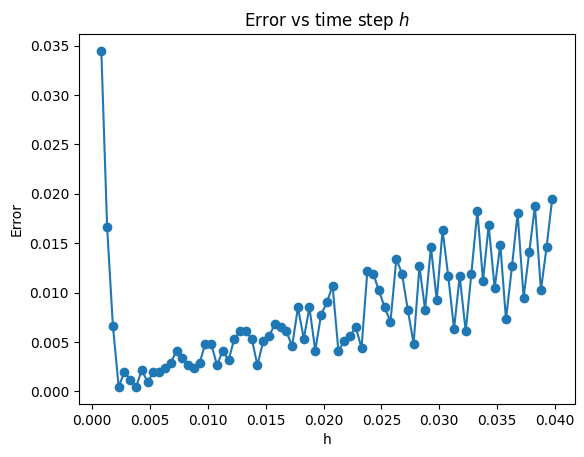

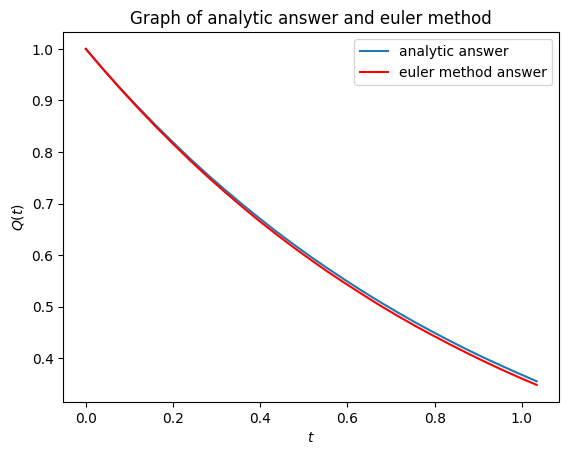

In [36]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=100
plt.rcParams['savefig.dpi']=100

Q0=1
R=1
C=1
T=1

def f(Q,t):               # dQ/dt=f(Q,t)
    return -Q/(R*C)

def Q(t):
    return Q0*np.exp(-t/(R*C))

H=np.arange(0.0008,0.04,0.0005,dtype=np.float16)
error=np.zeros(len(H),dtype=np.float16)

for i in range(len(H)):
    h=H[i]
    t=np.arange(0,T+h,h,dtype=np.float16)
    q=np.zeros(len(t),dtype=np.float16)
    q[0]=Q0
    for j in range(1,len(t)):
        q[j]=q[j-1]+h*f(q[j-1],t[j-1])
    error[i]=abs(q[-1]-Q(T))

plt.plot(H,error,'o-')
plt.xlabel('h')
plt.ylabel('Error')
plt.title(r'Error vs time step $h$')
plt.show()
plt.plot(t,Q(t),label=r'analytic answer')
plt.plot(t,q,label=r'euler method answer',color='r')
plt.xlabel(r'$t$')
plt.ylabel(r'$Q(t)$')
plt.title('Graph of analytic answer and euler method')
plt.legend()
plt.show()

**Unstability of method discussed in class for solving $\dot Q = -Q/RC$**

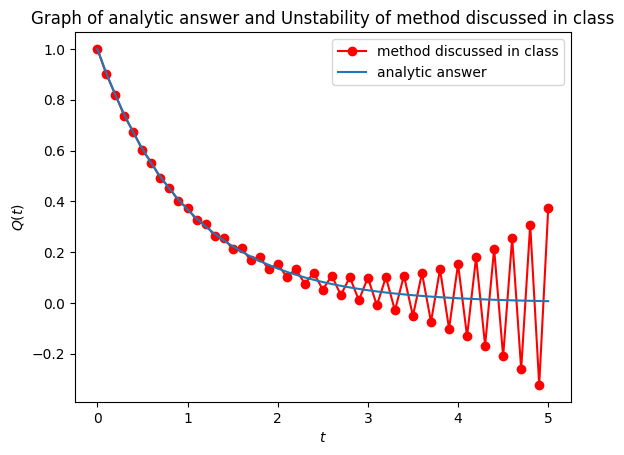

In [37]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=100
plt.rcParams['savefig.dpi']=100

Q0=1
R=1
C=1
T=5
h=0.1

def f(Q,t):               # dQ/dt=f(Q,t)
    return -Q/(R*C)

def Q(t):
    return Q0*np.exp(-t/(R*C))

t=np.arange(0,T+h,h)
q=np.zeros(len(t))
q[0]=Q0
q[1]=q[0]+h*f(q[0],t[0])
for j in range(2,len(t)):
    q[j]=q[j-2]+2*h*f(q[j-1],t[j-1])

plt.plot(t,q,'o-',label=r'method discussed in class',color='r')
plt.plot(t,Q(t),label=r'analytic answer')
plt.xlabel(r'$t$')
plt.ylabel(r'$Q(t)$')
plt.title('Graph of analytic answer and Unstability of method discussed in class')
plt.legend()
plt.show()

**Solving SHM $x''=-\omega^2 x$ with different Methods**


 For h=0.5:  



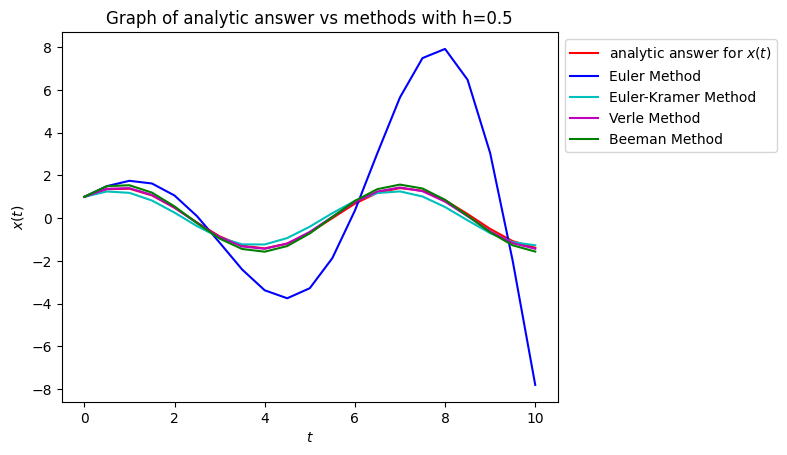

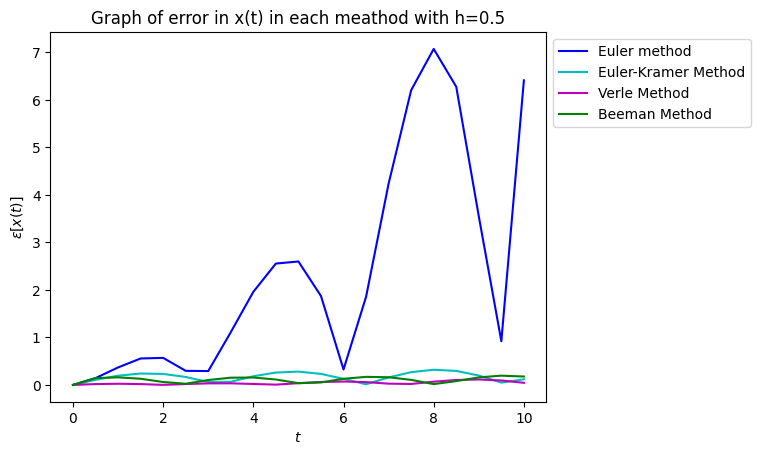

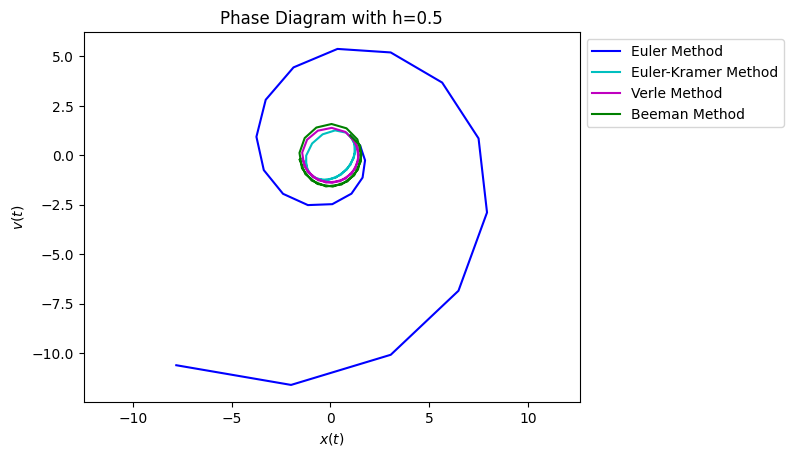

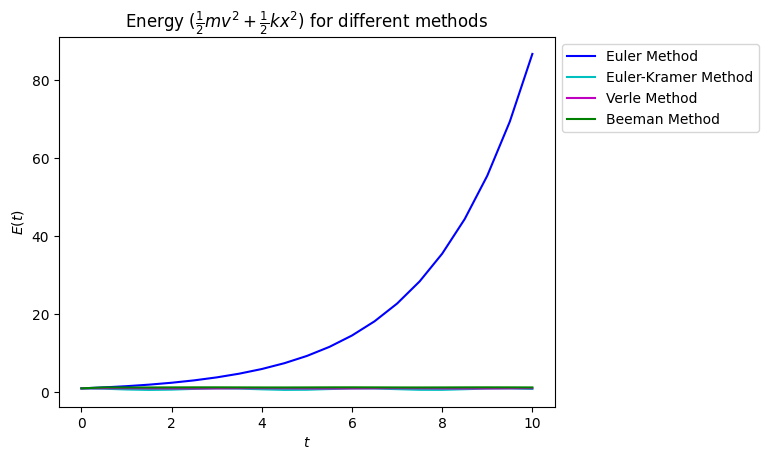


 For h=0.1:  



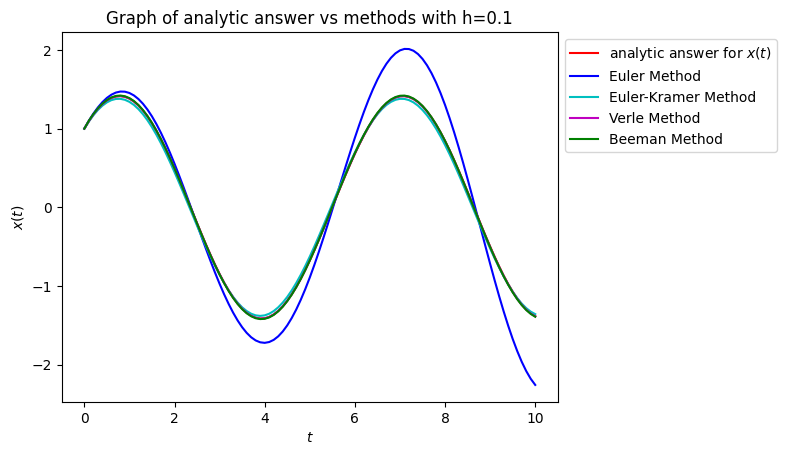

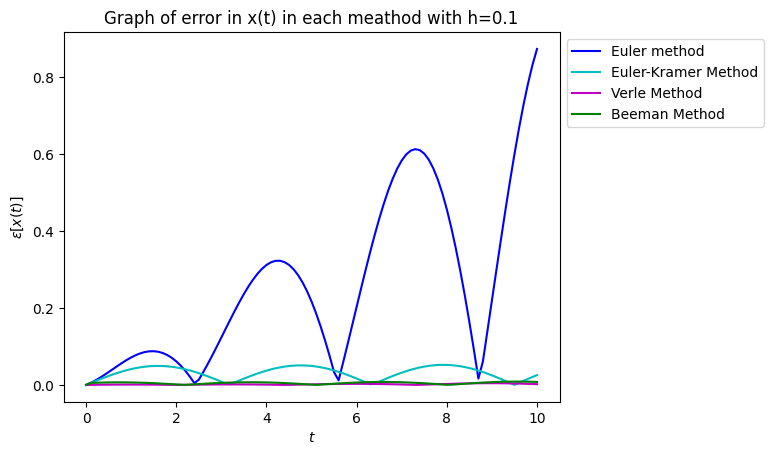

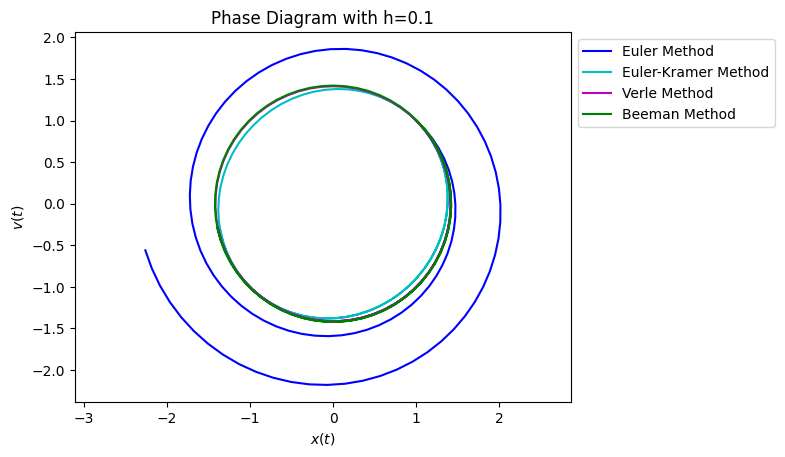

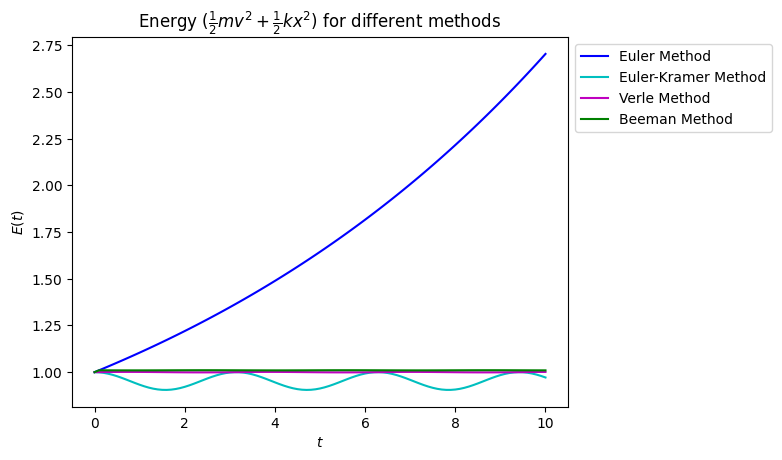


 For h=0.01:  



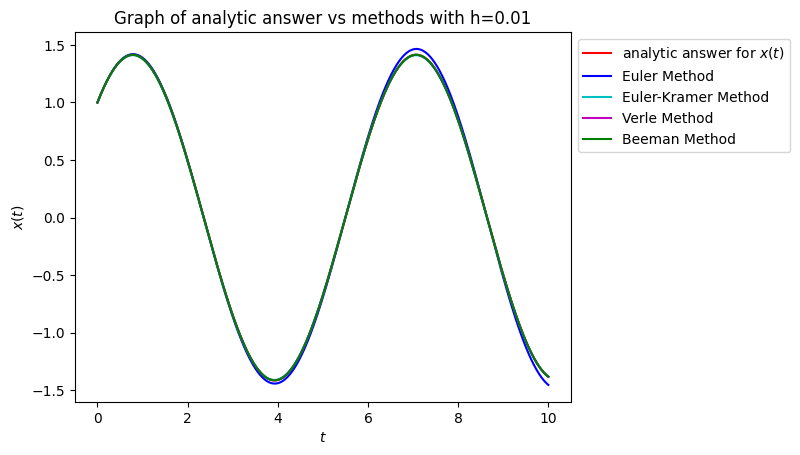

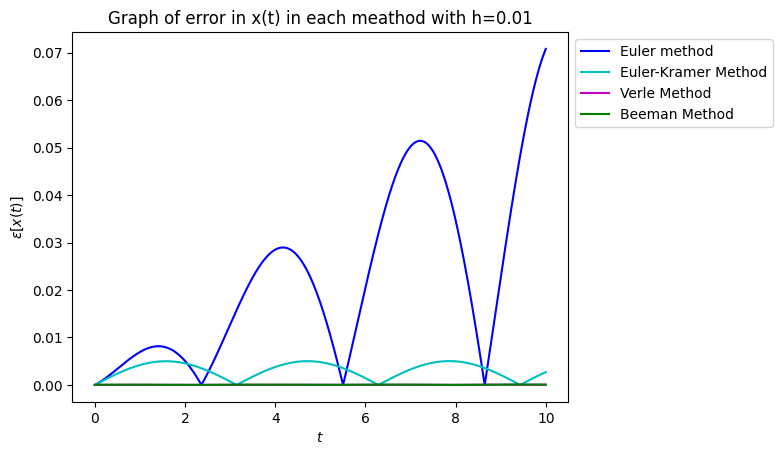

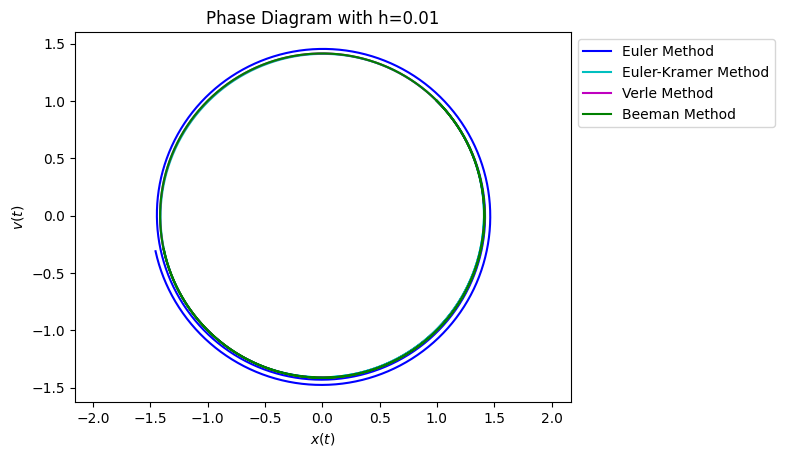

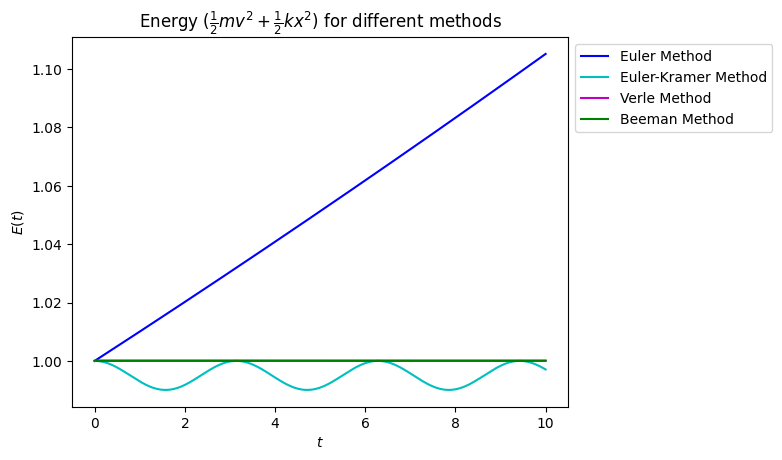

In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=100
plt.rcParams['savefig.dpi']=100

x0=1
v0=1
k=1
m=1
w=(k/m)**(0.5)
T=10
Hs=[0.5,0.1,0.01]

def X(x,v,t):
    return v
def V(x,v,t):
    return -(w**2)*x
def E(x,v,t):
    return 0.5*((m*v*v)+(k*x*x))
def ans_x(x0,v0,t):
    return (v0*np.sin(w*t)/w)+(x0*np.cos(w*t))
def ans_v(x0,v0,t):
    return (v0*np.cos(w*t))-(x0*w*np.sin(w*t))
for h in Hs:
    print('\n',f'For h={h}: ','\n')
    t=np.arange(0,T+h,h)
    x_euler=np.zeros(len(t))
    v_euler=np.zeros(len(t))
    x_ek=np.zeros(len(t))
    v_ek=np.zeros(len(t))
    x_verle=np.zeros(len(t))
    v_verle=np.zeros(len(t))
    x_beeman=np.zeros(len(t)+1)
    v_beeman=np.zeros(len(t)+1)
    x_frog=np.zeros(len(t)+1)
    v_frog=np.zeros(len(t)+1)
    x_euler[0],v_euler[0]=x0,v0
    x_ek[0],v_ek[0]=x0,v0
    x_verle[0],v_verle[0]=x0,v0
    x_beeman[0],v_beeman[0]=x0,v0
    x_frog[0],v_frog[0]=x0,v0
    x_beeman[1]=x_beeman[0]+h*X(x_beeman[0],v_beeman[0],t[0])
    v_beeman[1]=v_beeman[0]+h*V(x_beeman[0],v_beeman[0],t[0])
    x_frog[1]=x_frog[0]+h*X(x_frog[0],v_frog[0],t[0])
    v_frog[1]=v_frog[0]+h*V(x_frog[0],v_frog[0],t[0])

    for j in range(1,len(t)):
        x_euler[j]=x_euler[j-1]+h*X(x_euler[j-1],v_euler[j-1],t[j-1])
        v_euler[j]=v_euler[j-1]+h*V(x_euler[j-1],v_euler[j-1],t[j-1])

        v_ek[j]=v_ek[j-1]+h*V(x_ek[j-1],v_ek[j-1],t[j-1])
        x_ek[j]=x_ek[j-1]+h*X(x_ek[j-1],v_ek[j],t[j])

        x_verle[j]=x_verle[j-1]+h*X(x_verle[j-1],v_verle[j-1],t[j-1])+0.5*V(x_verle[j-1],v_verle[j-1],t[j-1])*h*h
        v_verle[j]=v_verle[j-1]+0.5*h*(V(x_verle[j-1],v_verle[j-1],t[j-1])+V(x_verle[j],v_verle[j],t[j]))

        x_beeman[j+1]=x_beeman[j]+h*X(x_beeman[j],v_beeman[j],t[j])+h*h*(4*V(x_beeman[j],v_beeman[j],t[j])-V(x_beeman[j-1],v_beeman[j-1],t[j-1]))/6
        v_beeman[j+1]=v_beeman[j]+h*(2*V(x_beeman[j+1],v_beeman[j+1],t[j])-V(x_beeman[j-1],v_beeman[j-1],t[j-1])+5*V(x_beeman[j],v_beeman[j],t[j]))/6

        x_frog[j+1]=x_frog[j-1]+X(x_frog[j],v_frog[j],t[j])*h
        v_frog[j+1]=v_frog[j-1]+V(x_frog[j],v_frog[j],t[j])*h

    x_beeman,v_beeman=np.delete(x_beeman,-1),np.delete(v_beeman,-1)
    x_frog,v_frog=np.delete(x_frog,-1),np.delete(v_frog,-1)

    plt.plot(t,ans_x(x0,v0,t),label=r'analytic answer for $x(t)$',color='r')
    plt.plot(t,x_euler,label=r'Euler Method',color='b')
    plt.plot(t,x_ek,label=r'Euler-Kramer Method',color='c')
    plt.plot(t,x_verle,label=r'Verle Method',color='m')
    plt.plot(t,x_beeman,label=r'Beeman Method',color='g')
    #plt.plot(t/2,x_frog,label=r'Frog Jump Method',color='y')
    plt.xlabel(r'$t$')
    plt.ylabel(r'$x(t)$')
    plt.title(f'Graph of analytic answer vs methods with h={h}')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    error_euler=abs(ans_x(x0,v0,t)-x_euler)
    error_ek=abs(ans_x(x0,v0,t)-x_ek)
    error_verle=abs(ans_x(x0,v0,t)-x_verle)
    error_beeman=abs(ans_x(x0,v0,t)-x_beeman)
    plt.plot(t,error_euler,label='Euler method',color='b')
    plt.plot(t,error_ek,label=r'Euler-Kramer Method',color='c')
    plt.plot(t,error_verle,label=r'Verle Method',color='m')
    plt.plot(t,error_beeman,label=r'Beeman Method',color='g')
    plt.xlabel(r'$t$')
    plt.ylabel(r'$\epsilon [x(t)]$')
    plt.title(f'Graph of error in x(t) in each meathod with h={h}')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    plt.plot(x_euler,v_euler,label=r'Euler Method',color='b')
    plt.plot(x_ek,v_ek,label=r'Euler-Kramer Method',color='c')
    plt.plot(x_verle,v_verle,label=r'Verle Method',color='m')
    plt.plot(x_beeman,v_beeman,label=r'Beeman Method',color='g')
    #plt.plot(x_frog,v_frog,label=r'Frog Jump Method',color='y')
    plt.xlabel(r'$x(t)$')
    plt.ylabel(r'$v(t)$')
    plt.title(f'Phase Diagram with h={h}')
    plt.axis("equal")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    plt.plot(t,E(x_euler,v_euler,t),label=r'Euler Method',color='b')
    plt.plot(t,E(x_ek,v_ek,t),label=r'Euler-Kramer Method',color='c')
    plt.plot(t,E(x_verle,v_verle,t),label=r'Verle Method',color='m')
    plt.plot(t,E(x_beeman,v_beeman,t),label=r'Beeman Method',color='g')
    #plt.plot(t/2,E(x_frog,v_frog,t/2),label=r'Frog Jump Method',color='y')
    plt.xlabel(r'$t$')
    plt.ylabel(r'$E(t)$')
    plt.title(r'Energy ($ \frac{1}{2}mv^2 + \frac{1}{2}kx^2$) for different methods')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()